# 계산 방법

|내용|프로그램 내부 계산방법|
|:------:|:-----:|
|최초 작성자 | 임동욱  |
|작성일시 | 2017. 03. 15|
|내용수정| |

## 프로그램에서 내부적으로 구현된 계산방법을 소개합니다.

이 문서의 모든 계산 과정은 python의 pandas 패키지를 이용해서 계산되니
직접 실행해 보시려고 하신다면,

python 배포판 중에서 anaconda 배포판을 설치하신 분은 내부적으로 설치가 되있으실 겁니다.  
따라서 그냥 따라하시면 되고  
만약 설치되어 있지 않으시다면,  
윈도우키 + R을 눌러서 실행창을 여신 다음  
cmd 입력 후 엔터 -> conda install pandas  
위의 명령어를 입력하시면 설치됩니다.

python 배포판 중에서 http://python.org/ 에서 다운받으신 분들은  
윈도우키 + R을 눌러서 실행창을 여신 다음  
cmd 입력 후 엔터 -> pip install pandas  
위의 명령어를 입력하시면 설치됩니다.

개인적으로는 아나콘다 배포판으로 파이썬을 설치하는 것을 추천드립니다.  
데이터처리 관련 패키지 혹은 시각화 패키지들이 자동으로 설치되어 있고,  
회사차원에서 관리가 잘되는 배포판이기 때문입니다.

*참고로 아래의 화면에서 pip 혹은 conda를 입력하시면 됩니다.*

<img src='img/실행창.png'></img>

계산을 하기에 앞서, DTG파일을 준비합니다.(확장자 : csv)  
현재 폴더에 1000개의 레코드를 가진, DTG파일이 존재합니다.

In [1]:
import os
os.listdir('.\\data')

['sample1000_type2015.csv', 'taxi_driver.xlsx']

위에서 보시면 sample1000_type2015.csv 파일이 해당 파일입니다.

계산 과정을 말씀드리기에 앞서, 패키지를 로딩하고 csv파일로부터 데이터를 읽어들입니다.

In [2]:
import pandas as pd
df = pd.read_csv('data\\sample1000_type2015.csv', encoding='cp949')

In [3]:
df.head()

구분            수집일시    교통사업자ID          차량ID            승차일시  \
0  법인  20151201001203  301200251  301330608501  20151201000000   
1  법인  20151201001228  301200298  301330604996  20151201000050   
2  법인  20151201004026  301200012  301340702298  20151201000150   
3  개인  20151201000957  301140790  301310707101  20151201000250   
4  법인  20151201000828  301200012  301340702259  20151201000351   

             하차일시  영업거리(M)     금액    결제구분  공차거리(M)  할증코드  
0  20151201001203     7179   8760  신용카드거래     5078     1  
1  20151201001228     4553   6840    현금거래     2608     1  
2  20151201004026    23757  24360  신용카드거래        0     1  
3  20151201000957     3497   5400    현금거래      256     1  
4  20151201000828     2089   4080  신용카드거래      771     1

정상적으로 데이터 테이블이 로딩된 것을 볼 수 있습니다.  
그리고, 인코딩을 cp949로 지정한 것은 해당 csv 파일이 인코딩이 cp949로 되어있기 때문입니다.  
참고로 ms949도 cp949 인코딩과 극히 유사한데, 어떤 인코딩을 이용해서 로딩해도 무방합니다.

*참고로, 몇 줄만 빠르게 읽어올 때는 다음과 같은 옵션을 사용합니다*

In [4]:
df = pd.read_csv('data\\sample1000_type2015.csv', encoding='cp949', nrows=3)

In [5]:
df

구분            수집일시    교통사업자ID          차량ID            승차일시  \
0  법인  20151201001203  301200251  301330608501  20151201000000   
1  법인  20151201001228  301200298  301330604996  20151201000050   
2  법인  20151201004026  301200012  301340702298  20151201000150   

             하차일시  영업거리(M)     금액    결제구분  공차거리(M)  할증코드  
0  20151201001203     7179   8760  신용카드거래     5078     1  
1  20151201001228     4553   6840    현금거래     2608     1  
2  20151201004026    23757  24360  신용카드거래        0     1

이제, 다시 1000줄짜리 데이터를 읽은 후, csv 파일을 다루기 쉬운 데이터로 바꾸는 과정을 진행해 보겠습니다.

In [6]:
df = pd.read_csv('data\\sample1000_type2015.csv', encoding='cp949')

In [7]:
df.head()

구분            수집일시    교통사업자ID          차량ID            승차일시  \
0  법인  20151201001203  301200251  301330608501  20151201000000   
1  법인  20151201001228  301200298  301330604996  20151201000050   
2  법인  20151201004026  301200012  301340702298  20151201000150   
3  개인  20151201000957  301140790  301310707101  20151201000250   
4  법인  20151201000828  301200012  301340702259  20151201000351   

             하차일시  영업거리(M)     금액    결제구분  공차거리(M)  할증코드  
0  20151201001203     7179   8760  신용카드거래     5078     1  
1  20151201001228     4553   6840    현금거래     2608     1  
2  20151201004026    23757  24360  신용카드거래        0     1  
3  20151201000957     3497   5400    현금거래      256     1  
4  20151201000828     2089   4080  신용카드거래      771     1

In [8]:
len(df)

1000

In [9]:
df.ix[0, '수집일시']

20151201001203

In [10]:
type(df.ix[0, '수집일시'])

numpy.int64

형식을 보니까, 단순한 숫자 형식으로 되어있기 때문에 파이썬으로 처리하기가 까다로울 수 있습니다.  
따라서 datetime 형식으로 변환시켜서 진행하겠습니다.

In [11]:
df['수집일시'] = pd.to_datetime(df['수집일시'])

In [12]:
df.head()

구분                          수집일시    교통사업자ID          차량ID            승차일시  \
0  법인 1970-01-01 05:35:51.201001203  301200251  301330608501  20151201000000   
1  법인 1970-01-01 05:35:51.201001228  301200298  301330604996  20151201000050   
2  법인 1970-01-01 05:35:51.201004026  301200012  301340702298  20151201000150   
3  개인 1970-01-01 05:35:51.201000957  301140790  301310707101  20151201000250   
4  법인 1970-01-01 05:35:51.201000828  301200012  301340702259  20151201000351   

             하차일시  영업거리(M)     금액    결제구분  공차거리(M)  할증코드  
0  20151201001203     7179   8760  신용카드거래     5078     1  
1  20151201001228     4553   6840    현금거래     2608     1  
2  20151201004026    23757  24360  신용카드거래        0     1  
3  20151201000957     3497   5400    현금거래      256     1  
4  20151201000828     2089   4080  신용카드거래      771     1

하지만, 예상과는 다르게 수집일시가 잘못 들어가 있는 것을 확인할 수 있습니다.  
형식 지정을 하지 않았기 때문입니다.  
형식 지정을 다시 한 다음, 변환을 해 보겠습니다.

In [13]:
df = pd.read_csv('data\\sample1000_type2015.csv', encoding='cp949')
df['수집일시'] = pd.to_datetime(df['수집일시'], format='%Y%m%d%H%M%S')
df.head()

구분                수집일시    교통사업자ID          차량ID            승차일시  \
0  법인 2015-12-01 00:12:03  301200251  301330608501  20151201000000   
1  법인 2015-12-01 00:12:28  301200298  301330604996  20151201000050   
2  법인 2015-12-01 00:40:26  301200012  301340702298  20151201000150   
3  개인 2015-12-01 00:09:57  301140790  301310707101  20151201000250   
4  법인 2015-12-01 00:08:28  301200012  301340702259  20151201000351   

             하차일시  영업거리(M)     금액    결제구분  공차거리(M)  할증코드  
0  20151201001203     7179   8760  신용카드거래     5078     1  
1  20151201001228     4553   6840    현금거래     2608     1  
2  20151201004026    23757  24360  신용카드거래        0     1  
3  20151201000957     3497   5400    현금거래      256     1  
4  20151201000828     2089   4080  신용카드거래      771     1

다음으로, 승차일시와 하차일시까지 형식 변환만 마무리 하면 준비작업은 얼추 마무리 됩니다.

In [14]:
df['승차일시'] = pd.to_datetime(df['승차일시'], format='%Y%m%d%H%M%S')
df['하차일시'] = pd.to_datetime(df['하차일시'], format='%Y%m%d%H%M%S')
df.head()

구분                수집일시    교통사업자ID          차량ID                승차일시  \
0  법인 2015-12-01 00:12:03  301200251  301330608501 2015-12-01 00:00:00   
1  법인 2015-12-01 00:12:28  301200298  301330604996 2015-12-01 00:00:50   
2  법인 2015-12-01 00:40:26  301200012  301340702298 2015-12-01 00:01:50   
3  개인 2015-12-01 00:09:57  301140790  301310707101 2015-12-01 00:02:50   
4  법인 2015-12-01 00:08:28  301200012  301340702259 2015-12-01 00:03:51   

                 하차일시  영업거리(M)     금액    결제구분  공차거리(M)  할증코드  
0 2015-12-01 00:12:03     7179   8760  신용카드거래     5078     1  
1 2015-12-01 00:12:28     4553   6840    현금거래     2608     1  
2 2015-12-01 00:40:26    23757  24360  신용카드거래        0     1  
3 2015-12-01 00:09:57     3497   5400    현금거래      256     1  
4 2015-12-01 00:08:28     2089   4080  신용카드거래      771     1

앞쪽에 숫자로 인덱싱이 되어있는데, 계산의 편의를 위해서  
승차일시를 기준으로 인덱싱을 하겠습니다.

In [15]:
df.index = df['승차일시']
df.head()

구분                수집일시    교통사업자ID          차량ID  \
승차일시                                                                   
2015-12-01 00:00:00  법인 2015-12-01 00:12:03  301200251  301330608501   
2015-12-01 00:00:50  법인 2015-12-01 00:12:28  301200298  301330604996   
2015-12-01 00:01:50  법인 2015-12-01 00:40:26  301200012  301340702298   
2015-12-01 00:02:50  개인 2015-12-01 00:09:57  301140790  301310707101   
2015-12-01 00:03:51  법인 2015-12-01 00:08:28  301200012  301340702259   

                                   승차일시                하차일시  영업거리(M)     금액  \
승차일시                                                                          
2015-12-01 00:00:00 2015-12-01 00:00:00 2015-12-01 00:12:03     7179   8760   
2015-12-01 00:00:50 2015-12-01 00:00:50 2015-12-01 00:12:28     4553   6840   
2015-12-01 00:01:50 2015-12-01 00:01:50 2015-12-01 00:40:26    23757  24360   
2015-12-01 00:02:50 2015-12-01 00:02:50 2015-12-01 00:09:57     3497   5400   
2015-12-01 00:03:51 2015-12-01 00:03:51 2015-12-01 00:08:28     2089   4080   

                       결제구분  공차거리(M)  할증코드  
승차일시                                        
2015-12-01 00:00:00  신용카드거래     5078     1  
2015-12-01 00:00:50    현금거래     2608     1  
2015-12-01 00:01:50  신용카드거래        0     1  
2015-12-01 00:02:50    현금거래      256     1  
2015-12-01 00:03:51  신용카드거래      771     1

## 계산방법

- 시간별 결제 건수

승차일시 기준으로, 승차시간이 있었던 해당 시간 대에 +1씩 해서 카운트 합니다.  
결제건수는 하차일시 기준으로 하는 것이 좀 더 정확 할 수 있지만,  
다른 계산들에서 승차일시 기준으로 사용하는 것이 많고,  
평균적으로 1시간을 택시를 타지 않는 다는 점에서 큰 차이가 나지 않기 때문에 승차일시를 기준으로 합니다.

In [16]:
df_tripcount_perhour = df.groupby(['구분', df.index.hour]).size().unstack()
df_tripcount_perhour

0   1   2   3   4   5   6   7   8   9  ...  14  15  16  17  18  19  20  \
구분                                         ...                               
개인  24  25   9   2   2   5   9  16  38  37 ...  27  31  27  24  28  27  25   
법인  33  17  20  17  17  13  15  28  20  17 ...  13  10  14  17  18  19  22   

    21  22  23  
구분              
개인  32  28  33  
법인  21  27  25  

[2 rows x 24 columns]

jupyter(혹은 ipython)에서는 간단하게 그래프로도 나타내볼 수 있습니다.  
jupyter가 아니면, 큰 차이는 없으나  
*import matplotlib.pyplot as plt  
plt.plot([0,1,2], [0,1,2])  
plt.show()*  
위와 유사한 과정을 거쳐야 합니다.

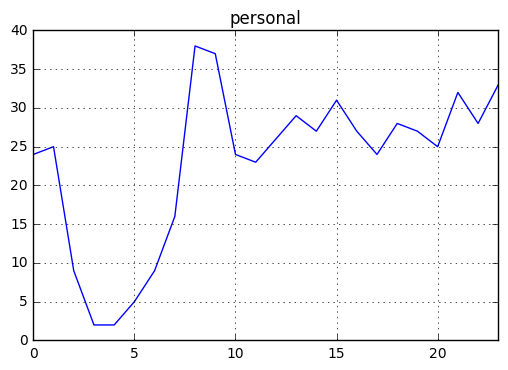

In [17]:
%matplotlib inline
plt = df_tripcount_perhour.iloc[0].plot(title='personal')
plt.grid()

그래프를 쉽게 구할 수 있었습니다. 물론, 특정한 날에서 총 1000개의 샘플을 뽑아서 도시화 한 것이기 때문에 의미는 없습니다.

- 시간별 & 할증구분별 결제건수 계산

이번에는 위의 '시간별 결제건수 계산'한 부분에서 조금 더 세부적으로 나눠보겠습니다.

In [18]:
df.groupby(['구분', '할증코드', df.index.hour]).size()

구분  할증코드    
개인  0     2      2
          4      2
          5      5
          6      8
          7     16
          8     38
          9     36
          10    23
          11    23
          12    26
          13    28
          14    27
          15    31
          16    26
          17    24
          18    27
          19    27
          20    24
          21    30
          22    27
          23    23
    1     0     20
          1     23
          2      7
          3      1
          23     5
    3     3      1
          6      1
          9      1
          10     1
                ..
법인  0     10    20
          11    18
          12    13
          13    13
          14    12
          15    10
          16    14
          17    17
          18    18
          19    18
          20    22
          21    21
          22    24
          23    20
    1     0     32
          1     13
          2     20
          3     15
          22     1
          23     3
    3     5      1

깔끔하게 분류 되는 것을 볼 수 있습니다. 하지만, 좀 더 보기좋게 나눌 필요가 있겠습니다.

In [19]:
df.groupby(['구분', '할증코드', df.index.hour]).size().unstack()

0     1     2     3     4     5     6     7     8     9   ...   \
구분 할증코드                                                              ...    
개인 0      NaN   NaN   2.0   NaN   2.0   5.0   8.0  16.0  38.0  36.0  ...    
   1     20.0  23.0   7.0   1.0   NaN   NaN   NaN   NaN   NaN   NaN  ...    
   3      NaN   NaN   NaN   1.0   NaN   NaN   1.0   NaN   NaN   1.0  ...    
   7      4.0   2.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...    
법인 0      NaN   NaN   NaN   2.0  17.0  12.0  15.0  28.0  20.0  17.0  ...    
   1     32.0  13.0  20.0  15.0   NaN   NaN   NaN   NaN   NaN   NaN  ...    
   3      NaN   NaN   NaN   NaN   NaN   1.0   NaN   NaN   NaN   NaN  ...    
   7      1.0   4.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...    

           14    15    16    17    18    19    20    21    22    23  
구분 할증코드                                                              
개인 0     27.0  31.0  26.0  24.0  27.0  27.0  24.0  30.0  27.0  23.0  
   1      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   5.0  
   3      NaN   NaN   1.0   NaN   1.0   NaN   1.0   2.0   1.0   3.0  
   7      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   2.0  
법인 0     12.0  10.0  14.0  17.0  18.0  18.0  22.0  21.0  24.0  20.0  
   1      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   1.0   3.0  
   3      1.0   NaN   NaN   NaN   NaN   1.0   NaN   NaN   2.0   1.0  
   7      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   1.0  

[8 rows x 24 columns]

unstack()은 데이터 테이블을 가로로 보기좋게 배열하지만,  
세로축이 가로줄보다 길어지면 원하지 않는 결과가 나올 수 있으므로 유의해서 사용해야합니다.  
조금 더 깔끔하게 정리하겠습니다.

In [20]:
df_tripcount_perhour_pervisib = df.groupby(['구분', '할증코드', df.index.hour]).size().unstack()
df_tripcount_perhour_pervisib.fillna(0).astype('int64')

0   1   2   3   4   5   6   7   8   9  ...  14  15  16  17  18  19  \
구분 할증코드                                         ...                           
개인 0      0   0   2   0   2   5   8  16  38  36 ...  27  31  26  24  27  27   
   1     20  23   7   1   0   0   0   0   0   0 ...   0   0   0   0   0   0   
   3      0   0   0   1   0   0   1   0   0   1 ...   0   0   1   0   1   0   
   7      4   2   0   0   0   0   0   0   0   0 ...   0   0   0   0   0   0   
법인 0      0   0   0   2  17  12  15  28  20  17 ...  12  10  14  17  18  18   
   1     32  13  20  15   0   0   0   0   0   0 ...   0   0   0   0   0   0   
   3      0   0   0   0   0   1   0   0   0   0 ...   1   0   0   0   0   1   
   7      1   4   0   0   0   0   0   0   0   0 ...   0   0   0   0   0   0   

         20  21  22  23  
구분 할증코드                  
개인 0     24  30  27  23  
   1      0   0   0   5  
   3      1   2   1   3  
   7      0   0   0   2  
법인 0     22  21  24  20  
   1      0   0   1   3  
   3      0   0   2   1  
   7      0   0   0   1  

[8 rows x 24 columns]

- 시간별 & 결제구분별 결제건수 계산

계산방법은 할증구분별 결제건수 계산 방법과 동일합니다.

In [21]:
df_tripcount_perhour_pervisib = df.groupby(['구분', '결제구분', df.index.hour]).size().unstack()
df_tripcount_perhour_pervisib.fillna(0).astype('int64')

0   1   2   3   4   5   6   7   8   9  ...  14  15  16  17  18  19  \
구분 결제구분                                           ...                           
개인 선불카드거래   2   1   0   0   0   0   0   0   2   1 ...   0   1   1   0   2   0   
   신용카드거래  16  17   5   1   1   3   7  12  23  22 ...  10  13  13  11  14  16   
   현금거래     6   7   4   1   1   2   2   4  13  14 ...  17  17  13  13  12  11   
법인 선불카드거래   1   0   1   2   1   0   0   2   0   0 ...   0   0   0   0   0   1   
   신용카드거래  21  13  10   9   9   7   9  18  14   7 ...   6   4   5  12   9   7   
   현금거래    11   4   9   6   7   6   6   8   6  10 ...   7   6   9   5   9  11   

           20  21  22  23  
구분 결제구분                    
개인 선불카드거래   2   0   1   1  
   신용카드거래  12  17  15  26  
   현금거래    11  15  12   6  
법인 선불카드거래   0   1   0   0  
   신용카드거래  10   9  15  13  
   현금거래    12  11  12  12  

[6 rows x 24 columns]

여기에서 주의할 부분은, 결제구분이 위에 있는 것만 포함되는 것이 아니라,  
신용카드거래취소(온라인), 신용카드거래취소(오프라인) 등의 추가 데이터가 포함되어 있어서  
적절하게 제거해줘야 합니다. 해당 부분은 이 문서에서 다루지 않습니다.

- 시간별 결제금액

시간별 결제건수와 비슷한 방법이지만, 이제 size()함수로 건수를 세는 것이 아니라 sum()함수로 합계를 세야합니다.

In [22]:
df.groupby(['구분', df.index.hour])['금액'].sum().unstack()

0       1       2       3      4       5      6       7       8   \
구분                                                                         
개인  283100  243800   84120   39440  13500   26200  70880   81300  347600   
법인  322700  265460  163200  106440  99700  134540  96000  202300  111900   

        9    ...        14      15      16      17      18      19      20  \
구분           ...                                                             
개인  209180   ...    167700  209900  157500  115700  166400  146640  188260   
법인   95100   ...     71160   57200   74300   84700  104700  148940  118100   

        21      22      23  
구분                          
개인  298360  197940  361460  
법인  140900  277120  294500  

[2 rows x 24 columns]

금액이 너무 커 보인다고 하면, 천단위로 볼 수도 있습니다.

In [23]:
df_faresum_perhour = df.groupby(['구분', df.index.hour])['금액'].sum().unstack()
df_faresum_perhour = df_faresum_perhour.apply(lambda x: x/1000)
df_faresum_perhour

0       1       2       3     4       5      6      7      8       9   \
구분                                                                             
개인  283.1  243.80   84.12   39.44  13.5   26.20  70.88   81.3  347.6  209.18   
법인  322.7  265.46  163.20  106.44  99.7  134.54  96.00  202.3  111.9   95.10   

     ...        14     15     16     17     18      19      20      21  \
구분   ...                                                                 
개인   ...    167.70  209.9  157.5  115.7  166.4  146.64  188.26  298.36   
법인   ...     71.16   57.2   74.3   84.7  104.7  148.94  118.10  140.90   

        22      23  
구분                  
개인  197.94  361.46  
법인  277.12  294.50  

[2 rows x 24 columns]

- 시간별 운행대수

시간별 운행대수는 다른 부분들에 비해서 계산이 조금 복잡합니다.  
개인택시에서 조 구분을 하면서 계산해야하기 때문에,  
각 운행별 자료 & 운행자 정보 & 부제별 분류 ==> 이 세가지가 모두 있어야 개인택시의 운행대수를 계산 할 수 있습니다.

계산방법을 설명하기 위한 문서이기 때문에, 자세한 코드 설명은 생략합니다.

In [24]:
os.listdir('data')

['sample1000_type2015.csv', 'taxi_driver.xlsx']

In [25]:
xl = pd.ExcelFile('data\\taxi_driver.xlsx')
xl.sheet_names

['개인', '법인', '개인택시 부제별분류']

In [26]:
df_driver_p = xl.parse(xl.sheet_names[0])
df_p_grp = xl.parse(xl.sheet_names[2])

첫번째로, 각 운행별자료입니다.

In [27]:
df.head()

구분                수집일시    교통사업자ID          차량ID  \
승차일시                                                                   
2015-12-01 00:00:00  법인 2015-12-01 00:12:03  301200251  301330608501   
2015-12-01 00:00:50  법인 2015-12-01 00:12:28  301200298  301330604996   
2015-12-01 00:01:50  법인 2015-12-01 00:40:26  301200012  301340702298   
2015-12-01 00:02:50  개인 2015-12-01 00:09:57  301140790  301310707101   
2015-12-01 00:03:51  법인 2015-12-01 00:08:28  301200012  301340702259   

                                   승차일시                하차일시  영업거리(M)     금액  \
승차일시                                                                          
2015-12-01 00:00:00 2015-12-01 00:00:00 2015-12-01 00:12:03     7179   8760   
2015-12-01 00:00:50 2015-12-01 00:00:50 2015-12-01 00:12:28     4553   6840   
2015-12-01 00:01:50 2015-12-01 00:01:50 2015-12-01 00:40:26    23757  24360   
2015-12-01 00:02:50 2015-12-01 00:02:50 2015-12-01 00:09:57     3497   5400   
2015-12-01 00:03:51 2015-12-01 00:03:51 2015-12-01 00:08:28     2089   4080   

                       결제구분  공차거리(M)  할증코드  
승차일시                                        
2015-12-01 00:00:00  신용카드거래     5078     1  
2015-12-01 00:00:50    현금거래     2608     1  
2015-12-01 00:01:50  신용카드거래        0     1  
2015-12-01 00:02:50    현금거래      256     1  
2015-12-01 00:03:51  신용카드거래      771     1

두번째로, 개인택시 운행자 정보입니다.

In [28]:
df_driver_p.head()

교통사업자ID          차량ID 교통사업자명    차량       번호   부제
0  301100014  301020001234    최대규   32°    ¡1234  NaN
1  301100002  301010040516    윤용택   32³    ª1234  NaN
2  301100031  301010047524    김태웅  TEST        8  NaN
3  301158098  301310507927    김강호    서울  31바7927    가
4  301158099  301310802155    한경희    서울  31자2155    가

세번째로, 개인택시 부제별 분류입니다.

In [29]:
df_p_grp

부제분류    부제
0    일반     가
1    일반     나
2    일반     다
3    라조  라1-3
4    라조  라2-4
5    9조     9
6   모범조    모범
7    제외  장애인콜
8    제외    대형
9    제외    고급
10   제외   NaN

목적은 부제별 분류를 하는 것이지만,  
각 운행별 자료만으로는 부제분류 테이블과 직접 연결이 불가능하기 때문에  
중간에 운행자 정보 테이블을 함께 사용합니다.

각 운행별 자료 테이블의 ['교통사업자ID', '차량ID']와  
개인택시 운행자 정보 테이블의 ['교통사업자ID', '차량ID']는 공통된 요소이기 때문에,  
이를 기반으로 두 테이블을 합칠 수 있습니다.

In [30]:
df_merged1 = pd.merge(df, df_driver_p,on=['교통사업자ID', '차량ID'])
df_merged1.head()

구분                수집일시    교통사업자ID          차량ID                승차일시  \
0  개인 2015-12-01 00:09:57  301140790  301310707101 2015-12-01 00:02:50   
1  개인 2015-12-01 00:12:07  301105486  301320805915 2015-12-01 00:05:50   
2  개인 2015-12-01 00:31:22  301160059  301320506263 2015-12-01 00:08:49   
3  개인 2015-12-01 00:33:57  301107921  301320602668 2015-12-01 00:09:49   
4  개인 2015-12-01 00:24:31  301135871  301320803376 2015-12-01 00:11:50   

                 하차일시  영업거리(M)     금액    결제구분  공차거리(M)  할증코드 교통사업자명  차량  \
0 2015-12-01 00:09:57     3497   5400    현금거래      256     1    강을현  서울   
1 2015-12-01 00:12:07     2475   4560    현금거래     8281     1    서용식  서울   
2 2015-12-01 00:31:22    11479  13440  신용카드거래     1625     1    유영규  서울   
3 2015-12-01 00:33:57    11490  13560  신용카드거래     4464     1    주명래  서울   
4 2015-12-01 00:24:31    10144  11160  신용카드거래     6467     1    김영오  서울   

        번호 부제  
0  31아7101  가  
1  32자5915  나  
2  32바6263  가  
3  32사2668  가  
4  32자3376  9

In [31]:
df.tail()

구분                수집일시    교통사업자ID          차량ID  \
승차일시                                                                   
2015-12-01 23:55:35  개인 2015-12-01 23:56:52  301105833  301320801802   
2015-12-01 23:56:39  개인 2015-12-02 00:37:35  301138079  301320702095   
2015-12-01 23:57:42  개인 2015-12-02 00:01:35  301150189  301320801043   
2015-12-01 23:58:47  법인 2015-12-02 00:39:07  301200283  301330808881   
2015-12-01 23:59:59  개인 2015-12-02 00:17:12  301133013  301310607429   

                                   승차일시                하차일시  영업거리(M)     금액  \
승차일시                                                                          
2015-12-01 23:55:35 2015-12-01 23:55:35 2015-12-01 23:56:52      796   3000   
2015-12-01 23:56:39 2015-12-01 23:56:39 2015-12-02 00:37:35    24598  25320   
2015-12-01 23:57:42 2015-12-01 23:57:42 2015-12-02 00:01:35     3392   4320   
2015-12-01 23:58:47 2015-12-01 23:58:47 2015-12-02 00:39:07    33130  32780   
2015-12-01 23:59:59 2015-12-01 23:59:59 2015-12-02 00:17:12     8570   9960   

                       결제구분  공차거리(M)  할증코드  
승차일시                                        
2015-12-01 23:55:35  선불카드거래     3051     0  
2015-12-01 23:56:39  신용카드거래    10200     1  
2015-12-01 23:57:42  신용카드거래     4520     1  
2015-12-01 23:58:47    현금거래     4727     7  
2015-12-01 23:59:59  신용카드거래    17086     1

In [32]:
import numpy as np
len(df_merged1)

531

In [33]:
len(df[df['구분'] == '개인'])

551

위의 수치에서 볼 수 있듯, 운행자 정보가 항상 최신으로 유지될 수가 없기 때문에,

$$ \frac{551 - 531}{551}$$

만큼의 데이터 분실율이 발생합니다.

In [34]:
(len(df[df['구분'] == '개인'])-len(df_merged1))/(len(df[df['구분'] == '개인'])) * 100

3.6297640653357535

이제 부제별 분류 테이블도 합쳐보겠습니다.

In [35]:
df_merged2 = pd.merge(df_merged1, df_p_grp, on='부제')
df_merged2.head()

구분                수집일시    교통사업자ID          차량ID                승차일시  \
0  개인 2015-12-01 00:09:57  301140790  301310707101 2015-12-01 00:02:50   
1  개인 2015-12-01 00:31:22  301160059  301320506263 2015-12-01 00:08:49   
2  개인 2015-12-01 00:33:57  301107921  301320602668 2015-12-01 00:09:49   
3  개인 2015-12-01 00:29:12  301151903  301320608001 2015-12-01 00:13:54   
4  개인 2015-12-01 00:23:51  301160433  301320608390 2015-12-01 00:17:57   

                 하차일시  영업거리(M)     금액    결제구분  공차거리(M)  할증코드 교통사업자명  차량  \
0 2015-12-01 00:09:57     3497   5400    현금거래      256     1    강을현  서울   
1 2015-12-01 00:31:22    11479  13440  신용카드거래     1625     1    유영규  서울   
2 2015-12-01 00:33:57    11490  13560  신용카드거래     4464     1    주명래  서울   
3 2015-12-01 00:29:12     6416   8640  신용카드거래      895     1    조계숙  서울   
4 2015-12-01 00:23:51     5909  25660  신용카드거래    24755     7    김성수  서울   

        번호 부제 부제분류  
0  31아7101  가   일반  
1  32바6263  가   일반  
2  32사2668  가   일반  
3  32사8001  가   일반  
4  32사8390  가   일반

부제 분류도 깔끔하게 붙었습니다.  
계산 속도 향상을 위해서는 필요없는 column을 제거 할 수 있지만,  
여기에서는 유지한채로 계산하겠습니다.

In [36]:
len(df_merged2)

531

여기에서는 분실된 데이터가 없는 것을 확인 할 수 있습니다.  
이렇게 준비된 테이블로부터 시간별 & 부제별 개인택시 운행대수를 구합니다.

In [37]:
df_opcount_perhour_persubtitle = df_merged2.groupby(['부제분류', df_merged2['승차일시'].dt.hour])['차량ID'].nunique().unstack()
df_opcount_perhour_persubtitle = df_opcount_perhour_persubtitle.fillna(0).astype('int64')
df_opcount_perhour_persubtitle

승차일시  0   1   2   3   4   5   6   7   8   9  ...  14  15  16  17  18  19  20  \
부제분류                                         ...                               
9조     2   4   3   0   0   0   2   1   0   0 ...   0   0   0   1   1   0   1   
라조     6   4   1   0   0   1   1   3   2   4 ...   3   6   3   1   6   5   4   
모범조    0   0   2   0   0   1   0   0   1   1 ...   0   0   0   0   1   0   0   
일반    16  16   3   2   1   3   6  11  33  30 ...  23  23  22  22  17  22  18   
제외     0   0   0   0   0   0   0   0   0   0 ...   0   1   1   0   0   0   0   

승차일시  21  22  23  
부제분류              
9조     2   7   2  
라조     8   1   3  
모범조    2   1   2  
일반    20  17  26  
제외     0   0   0  

[5 rows x 24 columns]

In [39]:
df_opcount_perhour_persubtitle.sum(axis=1).sum(axis=0)

531

위에서 살펴본 바와 같이 중복하는 데이터는 존재하지 않았고, 총 531개로 아까 구한 숫자와 동일 했습니다.  
따라서 이렇게 구하는 방식에는 약 3%에 해당하는 자료가 분실된다는 점 외에는,  
어떠한 불편한점이나 계산의 불합리가 없습니다.

In [40]:
df_opcarcount_perhour = df.groupby(['구분', df.index.hour])['차량ID'].nunique().unstack()
df_opcarcount_perhour

0   1   2   3   4   5   6   7   8   9  ...  14  15  16  17  18  19  20  \
구분                                         ...                               
개인  24  25   9   2   2   5   9  16  38  37 ...  27  31  27  24  28  27  25   
법인  33  17  20  17  17  13  15  28  20  17 ...  13  10  14  17  18  19  22   

    21  22  23  
구분              
개인  32  28  33  
법인  21  26  25  

[2 rows x 24 columns]

In [41]:
df_opcarcount_perhour.ix['개인'].sum()

551

이렇게 구한 값도, 데이터 분실전의 상황이기 때문에  
이전에 구했던 551이란 값과 동일합니다.

In [42]:
df_opcarcount_perhour_pervisib = df.groupby(['구분', '할증코드', df.index.hour])['차량ID'].nunique().unstack().fillna(0).astype('int64')
df_opcarcount_perhour_pervisib

0   1   2   3   4   5   6   7   8   9  ...  14  15  16  17  18  19  \
구분 할증코드                                         ...                           
개인 0      0   0   2   0   2   5   8  16  38  36 ...  27  31  26  24  27  27   
   1     20  23   7   1   0   0   0   0   0   0 ...   0   0   0   0   0   0   
   3      0   0   0   1   0   0   1   0   0   1 ...   0   0   1   0   1   0   
   7      4   2   0   0   0   0   0   0   0   0 ...   0   0   0   0   0   0   
법인 0      0   0   0   2  17  12  15  28  20  17 ...  12  10  14  17  18  18   
   1     32  13  20  15   0   0   0   0   0   0 ...   0   0   0   0   0   0   
   3      0   0   0   0   0   1   0   0   0   0 ...   1   0   0   0   0   1   
   7      1   4   0   0   0   0   0   0   0   0 ...   0   0   0   0   0   0   

         20  21  22  23  
구분 할증코드                  
개인 0     24  30  27  23  
   1      0   0   0   5  
   3      1   2   1   3  
   7      0   0   0   2  
법인 0     22  21  23  20  
   1      0   0   1   3  
   3      0   0   2   1  
   7      0   0   0   1  

[8 rows x 24 columns]

위의 테이블은 먼저 구분으로 나뉘고, 할증코드로 세부적으로 나뉜다음에, 각 시간대에서 유일한 값들을 센 값입니다.  
이렇게 하면, 얼핏 생각하기에 개인택시의 합계가 551이 나와야 할 것 같지만 실제로 그렇지 않습니다.  
혹시라도, 같게 나왔다면 시계가 같은 시간 내에서 잘나오거나 같은시간 내에서 심야와 일반으로 각각 결제한 경우가  
하나도 존재하지 않는 운좋은 경우입니다.  
아래에서 한번 계산해보겠습니다.

In [43]:
df_opcarcount_perhour_pervisib = df_opcarcount_perhour_pervisib.reset_index()

In [44]:
df_opcarcount_perhour_pervisib

구분  할증코드   0   1   2   3   4   5   6   7 ...  14  15  16  17  18  19  20  \
0  개인     0   0   0   2   0   2   5   8  16 ...  27  31  26  24  27  27  24   
1  개인     1  20  23   7   1   0   0   0   0 ...   0   0   0   0   0   0   0   
2  개인     3   0   0   0   1   0   0   1   0 ...   0   0   1   0   1   0   1   
3  개인     7   4   2   0   0   0   0   0   0 ...   0   0   0   0   0   0   0   
4  법인     0   0   0   0   2  17  12  15  28 ...  12  10  14  17  18  18  22   
5  법인     1  32  13  20  15   0   0   0   0 ...   0   0   0   0   0   0   0   
6  법인     3   0   0   0   0   0   1   0   0 ...   1   0   0   0   0   1   0   
7  법인     7   1   4   0   0   0   0   0   0 ...   0   0   0   0   0   0   0   

   21  22  23  
0  30  27  23  
1   0   0   5  
2   2   1   3  
3   0   0   2  
4  21  23  20  
5   0   1   3  
6   0   2   1  
7   0   0   1  

[8 rows x 26 columns]

In [45]:
df_tmp = df_opcarcount_perhour_pervisib[df_opcarcount_perhour_pervisib['구분'] == '개인']
df_tmp

구분  할증코드   0   1  2  3  4  5  6   7 ...  14  15  16  17  18  19  20  21  \
0  개인     0   0   0  2  0  2  5  8  16 ...  27  31  26  24  27  27  24  30   
1  개인     1  20  23  7  1  0  0  0   0 ...   0   0   0   0   0   0   0   0   
2  개인     3   0   0  0  1  0  0  1   0 ...   0   0   1   0   1   0   1   2   
3  개인     7   4   2  0  0  0  0  0   0 ...   0   0   0   0   0   0   0   0   

   22  23  
0  27  23  
1   0   5  
2   1   3  
3   0   2  

[4 rows x 26 columns]

In [46]:
df_tmp.ix[:,2:]

0   1   2   3   4   5   6   7   8   9  ...  14  15  16  17  18  19  20  21  \
0   0   0   2   0   2   5   8  16  38  36 ...  27  31  26  24  27  27  24  30   
1  20  23   7   1   0   0   0   0   0   0 ...   0   0   0   0   0   0   0   0   
2   0   0   0   1   0   0   1   0   0   1 ...   0   0   1   0   1   0   1   2   
3   4   2   0   0   0   0   0   0   0   0 ...   0   0   0   0   0   0   0   0   

   22  23  
0  27  23  
1   0   5  
2   1   3  
3   0   2  

[4 rows x 24 columns]

In [47]:
df_tmp.ix[:,2:].sum().sum()

551

제가 예상한 결과와는 다르게 개인택시의 합계와 같게 나왔군요  
하지만, 이것은 데이터 집합이 1000개 밖에 안되는 집합이었고,  
단순히 운이 좋아서 나온 결과라는 점을 인식 하셨으면 합니다.  
일반적으로는 551보다 큰 숫자가 나옵니다.

비슷한 관점에서 시간별 & 결제구분별 계산을 같은 방법으로 해보겠습니다.

In [48]:
df_ = df.groupby(['구분', '결제구분', df.index.hour])['차량ID'].nunique().unstack().fillna(0).astype('int64')
df_

0   1   2   3   4   5   6   7   8   9  ...  14  15  16  17  18  19  \
구분 결제구분                                           ...                           
개인 선불카드거래   2   1   0   0   0   0   0   0   2   1 ...   0   1   1   0   2   0   
   신용카드거래  16  17   5   1   1   3   7  12  23  22 ...  10  13  13  11  14  16   
   현금거래     6   7   4   1   1   2   2   4  13  14 ...  17  17  13  13  12  11   
법인 선불카드거래   1   0   1   2   1   0   0   2   0   0 ...   0   0   0   0   0   1   
   신용카드거래  21  13  10   9   9   7   9  18  14   7 ...   6   4   5  12   9   7   
   현금거래    11   4   9   6   7   6   6   8   6  10 ...   7   6   9   5   9  11   

           20  21  22  23  
구분 결제구분                    
개인 선불카드거래   2   0   1   1  
   신용카드거래  12  17  15  26  
   현금거래    11  15  12   6  
법인 선불카드거래   0   1   0   0  
   신용카드거래  10   9  15  13  
   현금거래    12  11  11  12  

[6 rows x 24 columns]

이번에도 개인택시의 합계가 551이 나오는지 확인해보겠습니다.

In [49]:
df_.reset_index(inplace=True)
df_

구분    결제구분   0   1   2  3  4  5  6   7 ...  14  15  16  17  18  19  20  21  \
0  개인  선불카드거래   2   1   0  0  0  0  0   0 ...   0   1   1   0   2   0   2   0   
1  개인  신용카드거래  16  17   5  1  1  3  7  12 ...  10  13  13  11  14  16  12  17   
2  개인    현금거래   6   7   4  1  1  2  2   4 ...  17  17  13  13  12  11  11  15   
3  법인  선불카드거래   1   0   1  2  1  0  0   2 ...   0   0   0   0   0   1   0   1   
4  법인  신용카드거래  21  13  10  9  9  7  9  18 ...   6   4   5  12   9   7  10   9   
5  법인    현금거래  11   4   9  6  7  6  6   8 ...   7   6   9   5   9  11  12  11   

   22  23  
0   1   1  
1  15  26  
2  12   6  
3   0   0  
4  15  13  
5  11  12  

[6 rows x 26 columns]

In [50]:
df_p = df_[df_['구분'] == '개인']
df_p

구분    결제구분   0   1  2  3  4  5  6   7 ...  14  15  16  17  18  19  20  21  \
0  개인  선불카드거래   2   1  0  0  0  0  0   0 ...   0   1   1   0   2   0   2   0   
1  개인  신용카드거래  16  17  5  1  1  3  7  12 ...  10  13  13  11  14  16  12  17   
2  개인    현금거래   6   7  4  1  1  2  2   4 ...  17  17  13  13  12  11  11  15   

   22  23  
0   1   1  
1  15  26  
2  12   6  

[3 rows x 26 columns]

In [51]:
df_p.ix[:,2:].sum().sum()

551

이번에도 운이 좋게 551이 나왔습니다.  
역시 데이터 집합이 너무 작아서 그런가봅니다.  
조금 데이터가 큰 것으로 똑같이 실행한 결과를 보겠습니다.


<img src='img\검증1.png'>

130만개의 레코드가 있는 하루치 레코드입니다.

<img src='img/검증2.png'>

개인택시의 합계는 33만이 나왔습니다.

<img src='img\검증3.png'>

<img src='img/검증4.png'>

확실히, 결제 구분별로 나눠서 하니까 47만이라는 값이 나왔습니다.  
33만보다는 꽤 큰 숫자인데,  
데이터가 많으니까 한시간 안에 여러가지 결제 수단을 사용할 확률이 높아지기 때문에  
차이가 날 수 밖에 없습니다.  
따라서, 이러한 값이 시사하는 바는 구분 기준이 달라지면, 기준 내의 운행대수의 합은 달라질 수 있다는 것입니다.

즉, 같은 시간 내에서 현금 결제 1회를 한 뒤, 신용카드 결제 1회를 한다면  
결제분류 기준에서는 중복을 배제했기 때문에 중복이 없지만  
이 상황을 할증에 대한 분류로 가져간다면  
할증에 대한 분류에서는 결제에 대한 기준이 무의미 하기때문에  
중복으로 합산되는 결과가 나올 수 있습니다.

이제, 설명이 필요한 계산들은 모두 끝났기 때문에  
계산에 관련된 부분을 표로 정리하고 마무리 하겠습니다.

|분류$^{(1)}$|계산방법|사용함수|
|---|:------:|:----:|
|시간당 결제건수|$\frac{결제건수}{24시간}$|```size()```|
|시간당 할증구분별 결제건수| $\frac{\text{할증구분별 결제건수}}{24시간}$ |```size()```|
|시간당 결제구분별 결제건수| $\frac{\text{결제구분별 결제건수}}{24시간}$|```size()```|
|시간당 운행대수|$\frac{운행대수}{24시간}$|```nunique()```|
|시간당 할증구분별 운행대수| $\frac{\text{할증구분별 운행대수}}{24시간}$ |```nunique()```|
|시간당 결제구분별 운행대수| $\frac{\text{결제구분별 운행대수}}{24시간}$|```nunique()```|
|시간당 운행대수별 결제건수| $\frac{\text{시간당 결제건수(테이블)}}{시간당 운행대수(테이블)}$|``` / ```|
|시간당 & 운행대수당 할증구분별 결제건수| $\frac{\text{시간당 할증구분별 결제건수(테이블)}}{시간당 운행대수(테이블)}$|```/```|
|시간당 & 운행대수당 결제구분별 결제건수| $\frac{\text{시간당 결제구분별 결제건수(테이블)}}{시간당 운행대수(테이블)}$|```/```|
|시간당 결제금액| $\frac{\text{결제금액}}{24시간}$|```sum()```|
|시간당 할증구분별 결제금액| $\frac{\text{할증구분별 결제금액}}{24시간}$ |```sum()```|
|시간당 결제구분별 결제금액| $\frac{\text{결제구분별 결제금액}}{24시간}$|```sum()```|
|시간당 & 운행대수당 결제금액| $\frac{\text{시간당 결제금액(테이블)}}{시간당 운행대수(테이블)}$|```/```|
|시간당 & 운행대수당 할증구분별 결제금액| $\frac{\text{시간당 할증구분별 결제금액(테이블)}}{시간당 운행대수(테이블)}$|```/```|
|시간당 & 운행대수당 결제구분별 결제금액| $\frac{\text{시간당 결제구분별 결제금액(테이블)}}{시간당 운행대수(테이블)}$|```/```|
|시간당 & 결제건수당 결제금액| $\frac{\text{시간당 결제금액(테이블)}}{시간당 결제건수(테이블)}$|```/```|
|시간당 & 결제건수당 할증구분별 결제금액| $\frac{\text{시간당 할증구분별 결제금액(테이블)}}{시간당 결제건수(테이블)}$|```/```|
|시간당 & 결제건수당 결제구분별 결제금액| $\frac{\text{시간당 결제구분별 결제금액(테이블)}}{시간당 결제건수(테이블)}$|```/```|
|시간당 영업거리| $\frac{\text{영업거리}}{24시간}$|```sum()```|
|시간당 할증구분별 영업거리| $\frac{\text{할증구분별 영업거리}}{24시간}$ |```sum()```|
|시간당 결제구분별 영업거리| $\frac{\text{결제구분별 영업거리}}{24시간}$|```sum()```|
|시간당 & 운행대수당 영업거리| $\frac{\text{시간당 영업거리(테이블)}}{시간당 운행대수(테이블)}$|```/```|
|시간당 & 운행대수당 할증구분별 영업거리| $\frac{\text{시간당 할증구분별 영업거리(테이블)}}{시간당 운행대수(테이블)}$|```/```|
|시간당 & 운행대수당 결제구분별 영업거리| $\frac{\text{시간당 결제구분별 영업거리(테이블)}}{시간당 운행대수(테이블)}$|```/```|
|시간당 & 결제건수당 영업거리| $\frac{\text{시간당 영업거리(테이블)}}{시간당 결제건수(테이블)}$|```/```|
|시간당 & 결제건수당 할증구분별 영업거리| $\frac{\text{시간당 할증구분별 영업거리(테이블)}}{시간당 결제건수(테이블)}$|```/```|
|시간당 & 결제건수당 결제구분별 영업거리| $\frac{\text{시간당 결제구분별 영업거리(테이블)}}{시간당 결제건수(테이블)}$|```/```|
|시간당 영업시간$^{(2)}$| $\frac{\text{영업시간}}{24시간}$|```sum()```|
|시간당 할증구분별 영업시간| $\frac{\text{할증구분별 영업시간}}{24시간}$ |```sum()```|
|시간당 결제구분별 영업시간| $\frac{\text{결제구분별 영업시간}}{24시간}$|```sum()```|
|시간당 & 운행대수당 영업시간| $\frac{\text{시간당 영업시간(테이블)}}{시간당 운행대수(테이블)}$|```/```|
|시간당 & 운행대수당 할증구분별 영업시간| $\frac{\text{시간당 할증구분별 영업시간(테이블)}}{시간당 운행대수(테이블)}$|```/```|
|시간당 & 운행대수당 결제구분별 영업시간| $\frac{\text{시간당 결제구분별 영업시간(테이블)}}{시간당 운행대수(테이블)}$|```/```|
|시간당 & 결제건수당 영업시간| $\frac{\text{시간당 영업시간(테이블)}}{시간당 결제건수(테이블)}$|```/```|
|시간당 & 결제건수당 할증구분별 영업시간| $\frac{\text{시간당 할증구분별 영업시간(테이블)}}{시간당 결제건수(테이블)}$|```/```|
|시간당 & 결제건수당 결제구분별 영업시간| $\frac{\text{시간당 결제구분별 영업시간(테이블)}}{시간당 결제건수(테이블)}$|```/```|

(1) 일별, 요일별 또한 개념자체는 완벽하게 동일 한 개념입니다.  
(2) 영업시간 = 하차일시 - 승차일시

In [56]:
print("""
 ________  ________  ________  ________          ___       ___  ___  ________  ___  __       
|\\   ____\\|\\   __  \\|\\   __  \\|\\   ___ \\        |\\  \\     |\\  \\|\\  \\|\\   ____\\|\\  \\|\\  \\     
\\ \\  \\___|\\ \\  \\|\\  \\ \\  \\|\\  \\ \\  \\_|\\ \\       \\ \\  \\    \\ \\  \\\\\\  \\ \\  \\___|\\ \\  \\/  /|_   
 \\ \\  \\  __\\ \\  \\\\\\  \\ \\  \\\\\\  \\ \\  \\ \\\\ \\       \\ \\  \\    \\ \\  \\\\\\  \\ \\  \\    \\ \\   ___  \\  
  \\ \\  \\|\\  \\ \\  \\\\\\  \\ \\  \\\\\\  \\ \\  \\_\\\\ \\       \\ \\  \\____\\ \\  \\\\\\  \\ \\  \\____\\ \\  \\\\ \\  \\ 
   \\ \\_______\\ \\_______\\ \\_______\\ \\_______\\       \\ \\_______\\ \\_______\\ \\_______\\ \\__\\\\ \\__\\
    \\|_______|\\|_______|\\|_______|\\|_______|        \\|_______|\\|_______|\\|_______|\\|__| \\|__|
                                                                                             
                                                                                             
                                                                                            
                                                                                            """)


 ________  ________  ________  ________          ___       ___  ___  ________  ___  __       
|\   ____\|\   __  \|\   __  \|\   ___ \        |\  \     |\  \|\  \|\   ____\|\  \|\  \     
\ \  \___|\ \  \|\  \ \  \|\  \ \  \_|\ \       \ \  \    \ \  \\\  \ \  \___|\ \  \/  /|_   
 \ \  \  __\ \  \\\  \ \  \\\  \ \  \ \\ \       \ \  \    \ \  \\\  \ \  \    \ \   ___  \  
  \ \  \|\  \ \  \\\  \ \  \\\  \ \  \_\\ \       \ \  \____\ \  \\\  \ \  \____\ \  \\ \  \ 
   \ \_______\ \_______\ \_______\ \_______\       \ \_______\ \_______\ \_______\ \__\\ \__\
    \|_______|\|_______|\|_______|\|_______|        \|_______|\|_______|\|_______|\|__| \|__|
                                                                                             
                                                                                             
                                                                                            
                                                            